In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Austin ABIA Airport Passenger Analysis**

In [2]:
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt
import numpy as np
!pip install matrixprofile 
import matrixprofile as mp

     |████████████████████████████████| 1.1MB 3.9MB/s 
     |████████████████████████████████| 1.3MB 43.5MB/s 
ERROR: googleapis-common-protos 1.53.0 has requirement protobuf>=3.12.0, but you'll have protobuf 3.11.2 which is incompatible.
ERROR: google-api-core 1.26.3 has requirement protobuf>=3.12.0, but you'll have protobuf 3.11.2 which is incompatible.
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [5]:
data=df =pd.read_excel('/content/drive/MyDrive/Released Records_21FO003112 (1) (1).xlsx')  
data

,Date,Austin Bergstrom International (AUS)
0,2021-03-22,13233
1,2021-03-21,16360
2,2021-03-20,10634
3,2021-03-19,12608
4,2021-03-18,13436
...,...,...
807,2019-01-05,16446
808,2019-01-04,19516
809,2019-01-03,21204
810,2019-01-02,22821


**Sorted according to date**

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

In [7]:
df.head()

,Austin Bergstrom International (AUS)
Date,
2019-01-01,20946
2019-01-02,22821
2019-01-03,21204
2019-01-04,19516
2019-01-05,16446


In [8]:
df['Austin Bergstrom International (AUS) '].describe()

count      812.000000
mean     15933.551724
std       9353.979533
min          0.000000
25%       7099.250000
50%      17208.000000
75%      25029.750000
max      32649.000000
Name: Austin Bergstrom International (AUS) , dtype: float64

**This is a plot of date Vs daily passenger on the airport.**

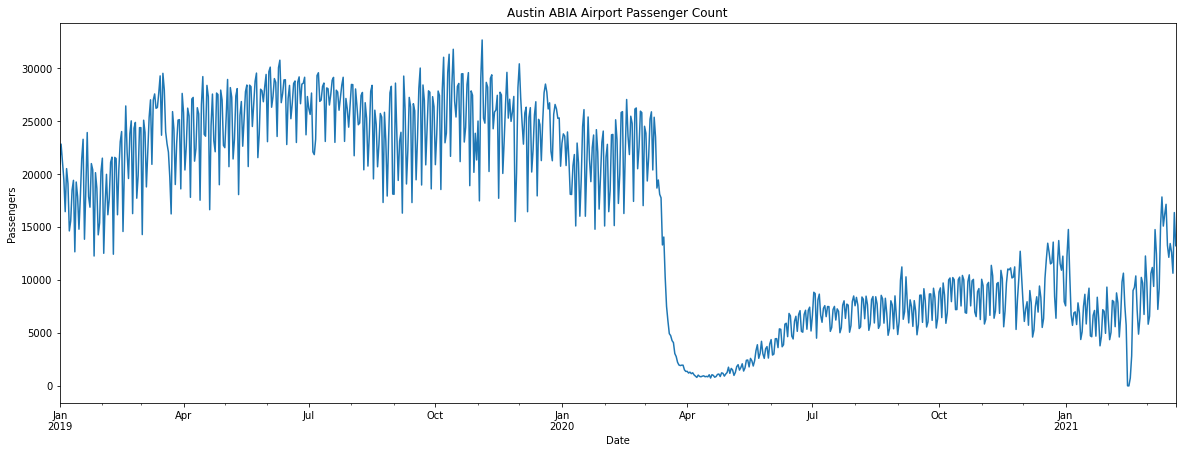

In [9]:
df.plot(figsize=(20,7), legend=None, title='Austin ABIA Airport Passenger Count')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

In [10]:
data['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



0      12
1      11
2      11
3      11
4      11
       ..
807     1
808     1
809     1
810     1
811     1
Name: Date, Length: 812, dtype: int64

**Converting date to week number and making separate column for the week entries.**

In [11]:
data['Week_Number'] = data['Date'].dt.week
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Date,Austin Bergstrom International (AUS),Week_Number
0,2021-03-22,13233,12
1,2021-03-21,16360,11
2,2021-03-20,10634,11
3,2021-03-19,12608,11
4,2021-03-18,13436,11
...,...,...,...
807,2019-01-05,16446,1
808,2019-01-04,19516,1
809,2019-01-03,21204,1
810,2019-01-02,22821,1


In [12]:
data.isnull().sum()

Date                                     0
Austin Bergstrom International (AUS)     0
Week_Number                              0
dtype: int64

**Data to be considered for clustering**

In [13]:
x = data[['Week_Number','Austin Bergstrom International (AUS) ']].values

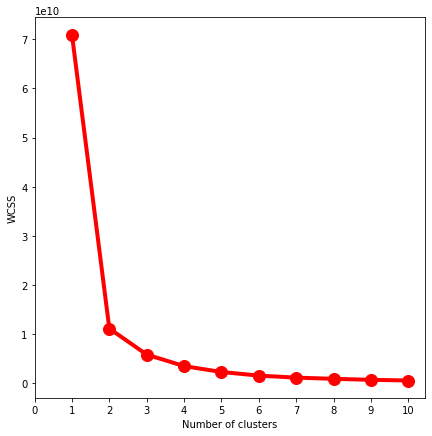

In [14]:

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



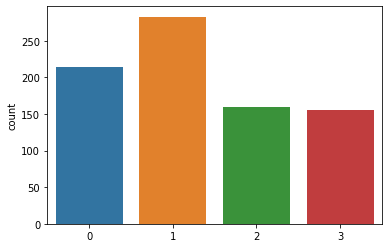

In [16]:
sns.countplot(y_clusters)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

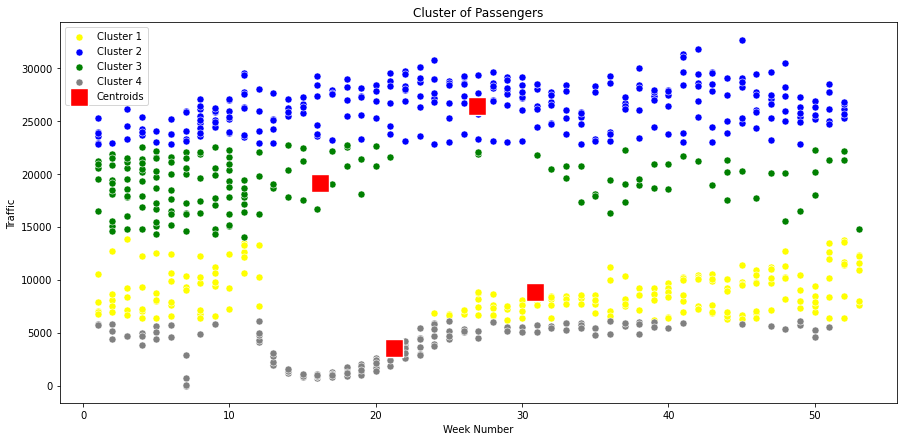

In [17]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x[y_clusters == 0, 0], x[y_clusters == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_clusters == 1, 0], x[y_clusters == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_clusters == 2, 0], x[y_clusters == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_clusters == 3, 0], x[y_clusters == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_clusters == 4, 0], x[y_clusters == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Cluster of Passengers')
plt.xlabel('Week Number')
plt.ylabel('Traffic')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

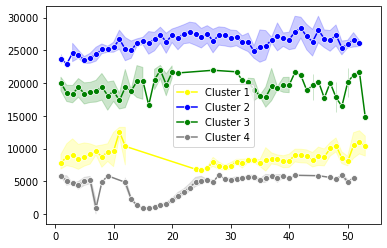

In [18]:
sns.lineplot(x[y_clusters == 0, 0], x[y_clusters == 0, 1], color = 'yellow', label = 'Cluster 1',marker="o")
sns.lineplot(x[y_clusters == 1, 0], x[y_clusters == 1, 1], color = 'blue', label = 'Cluster 2',marker="o")
sns.lineplot(x[y_clusters == 2, 0], x[y_clusters == 2, 1], color = 'green', label = 'Cluster 3',marker="o")
sns.lineplot(x[y_clusters == 3, 0], x[y_clusters == 3, 1], color = 'grey', label = 'Cluster 4',marker="o")
plt.show()

In [19]:
del data['Date']

In [20]:
dta= pd.DataFrame(data,columns=["Week_Number","Austin Bergstrom International (AUS) "])

In [21]:
dta.head

<bound method NDFrame.head of      Week_Number  Austin Bergstrom International (AUS) 
0             12                                  13233
1             11                                  16360
2             11                                  10634
3             11                                  12608
4             11                                  13436
..           ...                                    ...
807            1                                  16446
808            1                                  19516
809            1                                  21204
810            1                                  22821
811            1                                  20946

[812 rows x 2 columns]>

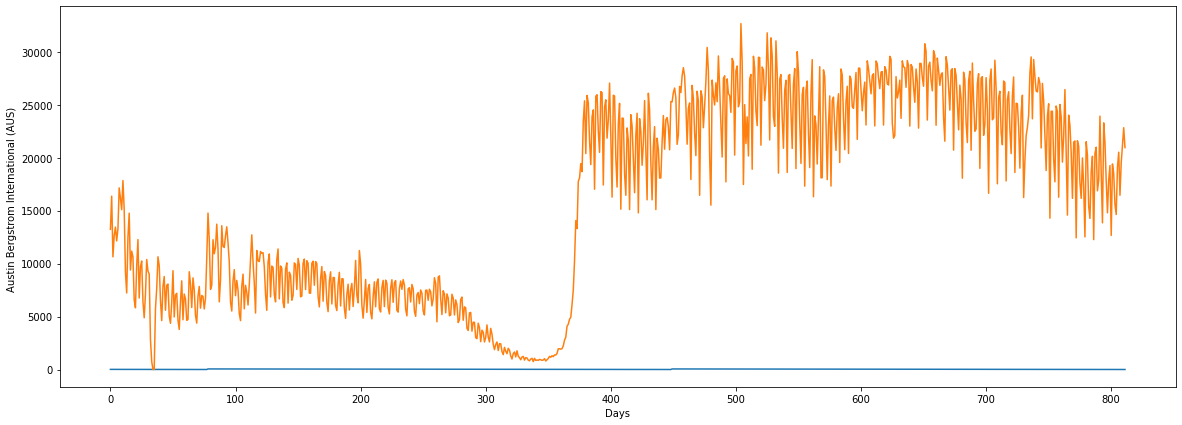

In [22]:
dta.plot(figsize=(20,7), legend=None)
plt.xlabel('Days')
plt.ylabel('Austin Bergstrom International (AUS) ')
plt.show()

In [23]:
windows = [
    ('4 days', 4),
    ('7 days', 8),
    ('12 days', 12),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(dta['Austin Bergstrom International (AUS) '].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

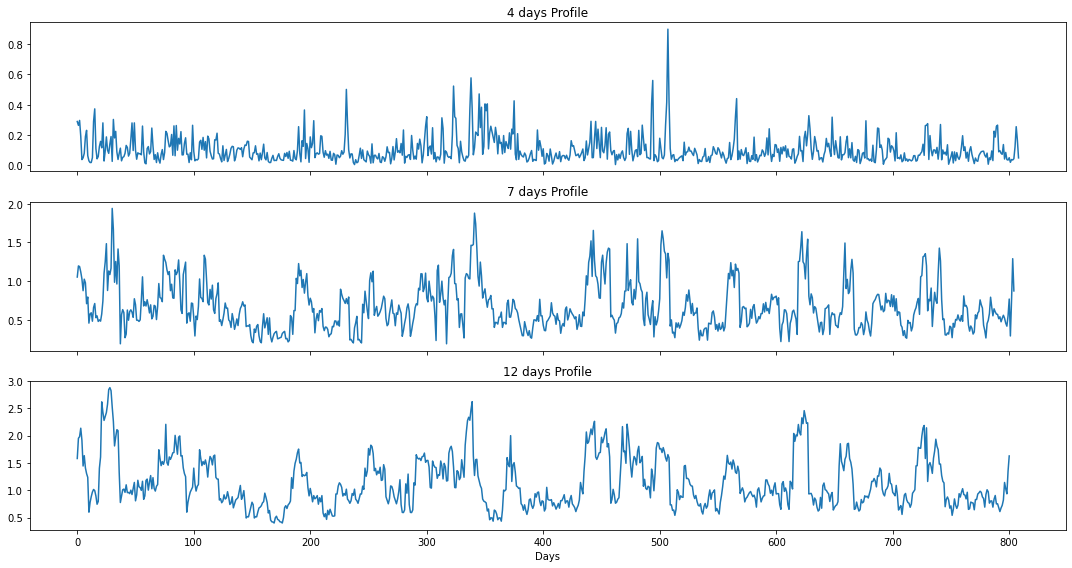

In [24]:
#Plot the signal data
fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,8))

for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Days')
plt.tight_layout()
plt.show()

**Anamolies Detection for different window sizes**

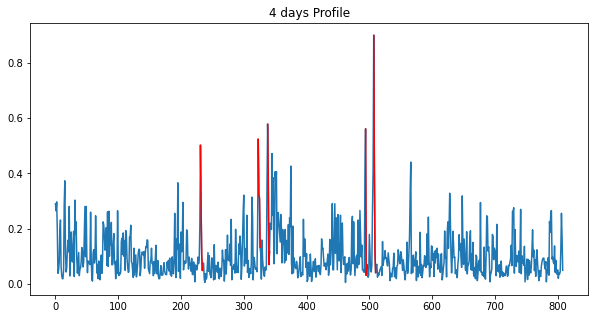

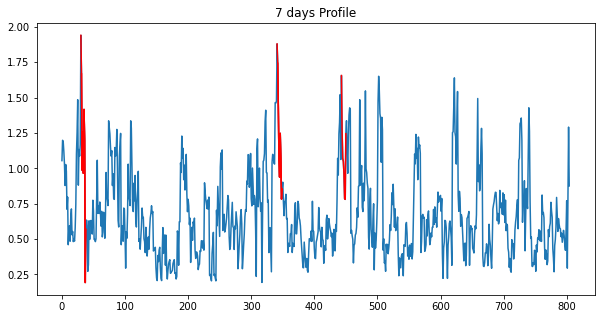

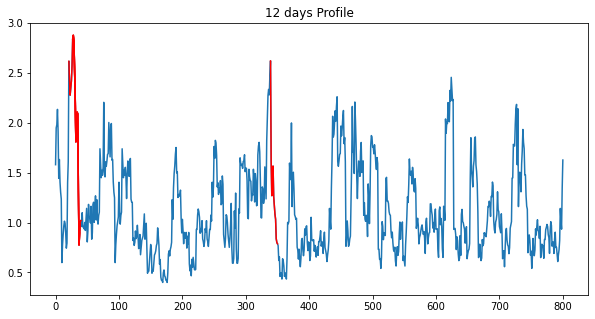

In [25]:

for label, window_size in windows:
    key = '{} Profile'.format(label)
    profiles[key] = mp.discover.discords(profiles[key], k=5)
    
    window_size = profiles[key]['w']
    mp_adjusted = np.append(profiles[key]['mp'], np.zeros(window_size - 1) + np.nan)
    
    plt.figure(figsize=(10, 5))
    ax = plt.plot(dta.index.values, mp_adjusted)
    plt.title(key)
    
    for start_index in profiles[key]['discords']:
        x = dta.index.values[start_index:start_index+window_size]
        y = mp_adjusted[start_index:start_index+window_size]
        plt.plot(x, y, c='r')
    
    plt.show()

**Top 5 Discords for 4 Day Matrix Profile**

In [26]:

key = '4 days Profile'
profile = profiles[key]
window_size = profile['w']
mp_adjusted = np.append(profile['mp'], np.zeros(window_size - 1) + np.nan)
dta[key] = mp_adjusted

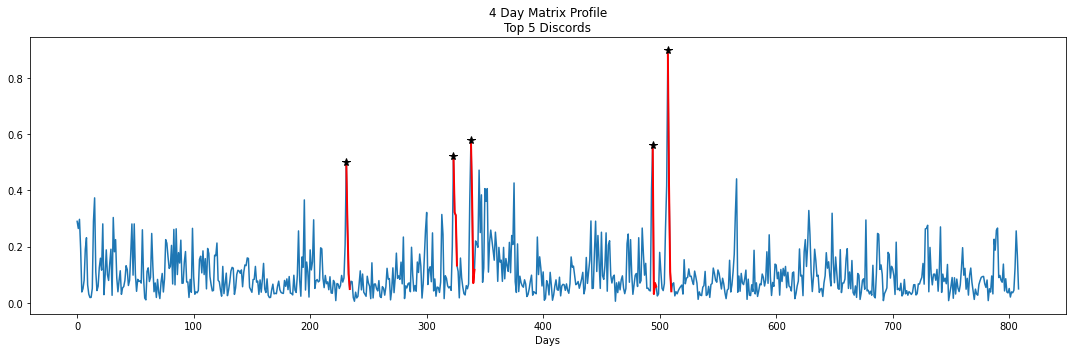

In [27]:
ax = dta[key].plot(title='4 Day Matrix Profile\nTop 5 Discords', figsize=(15,5))

for discord in profile['discords']:
    dta.iloc[discord:discord+window_size][key].plot(ax=ax, c='r', lw='2')

dta.iloc[profile['discords']][key].plot(kind='line', marker='*', c='black', markersize=8, ax=ax, lw=0)
plt.xlabel('Days')
plt.tight_layout()
plt.show()

In [28]:
dta.head()

,Week_Number,Austin Bergstrom International (AUS),4 days Profile
0,12,13233,0.289746
1,11,16360,0.264321
2,11,10634,0.296897
3,11,12608,0.191925
4,11,13436,0.038642


In [29]:
del dta['4 days Profile']

In [30]:
dta

,Week_Number,Austin Bergstrom International (AUS)
0,12,13233
1,11,16360
2,11,10634
3,11,12608
4,11,13436
...,...,...
807,1,16446
808,1,19516
809,1,21204
810,1,22821


**I have eliminated some weeks from the end of the dataset to avoid the repeation of some weeks more than others.**

In [31]:
dr=dta.iloc[ :733]

In [32]:
dr

,Week_Number,Austin Bergstrom International (AUS)
0,12,13233
1,11,16360
2,11,10634
3,11,12608
4,11,13436
...,...,...
728,13,24220
729,12,25888
730,12,16231
731,12,19726


**Taking total traffic on each week of the year**

In [33]:
busiest_day = dr.groupby(["Week_Number"]).sum()
busiest_day = busiest_day.reset_index()
busiest_day

,Week_Number,Austin Bergstrom International (AUS)
0,1,211529
1,2,184730
2,3,189094
3,4,194539
4,5,188374
5,6,198178
6,7,182734
7,8,223573
8,9,230572
9,10,254676


**Clustering according to week vs Passenger traffic**

In [34]:
x = busiest_day[['Week_Number','Austin Bergstrom International (AUS) ']].values

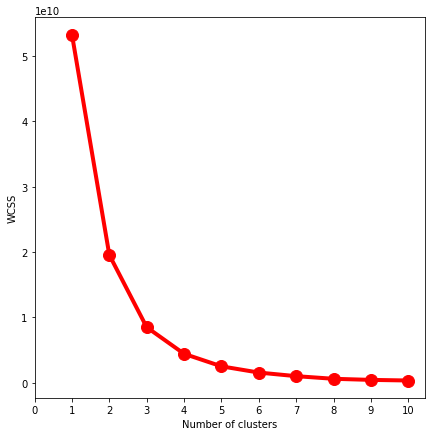

In [35]:

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [36]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



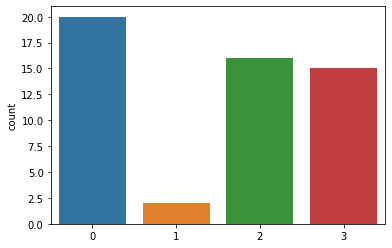

In [37]:
sns.countplot(y_clusters)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

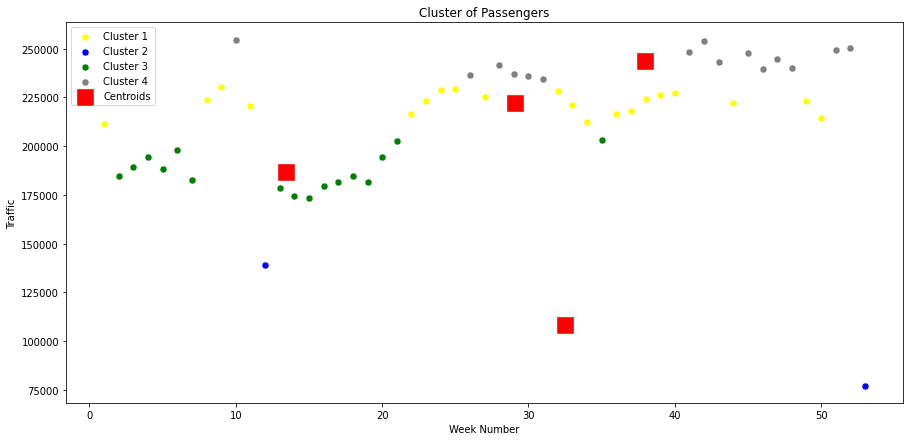

In [38]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x[y_clusters == 0, 0], x[y_clusters == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_clusters == 1, 0], x[y_clusters == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_clusters == 2, 0], x[y_clusters == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_clusters == 3, 0], x[y_clusters == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
#sns.scatterplot(x[y_clusters == 4, 0], x[y_clusters == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Cluster of Passengers')
plt.xlabel('Week Number')
plt.ylabel('Traffic')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

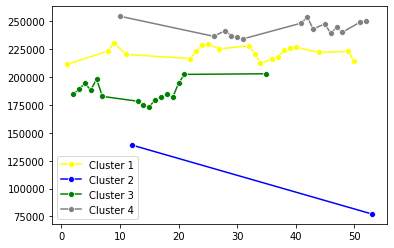

In [39]:
sns.lineplot(x[y_clusters == 0, 0], x[y_clusters == 0, 1], color = 'yellow', label = 'Cluster 1',marker="o")
sns.lineplot(x[y_clusters == 1, 0], x[y_clusters == 1, 1], color = 'blue', label = 'Cluster 2',marker="o")
sns.lineplot(x[y_clusters == 2, 0], x[y_clusters == 2, 1], color = 'green', label = 'Cluster 3',marker="o")
sns.lineplot(x[y_clusters == 3, 0], x[y_clusters == 3, 1], color = 'grey', label = 'Cluster 4',marker="o")
plt.show()

In [40]:
busiest_day.head(10)

,Week_Number,Austin Bergstrom International (AUS)
0,1,211529
1,2,184730
2,3,189094
3,4,194539
4,5,188374
5,6,198178
6,7,182734
7,8,223573
8,9,230572
9,10,254676


**Week VS Passangers each Week**

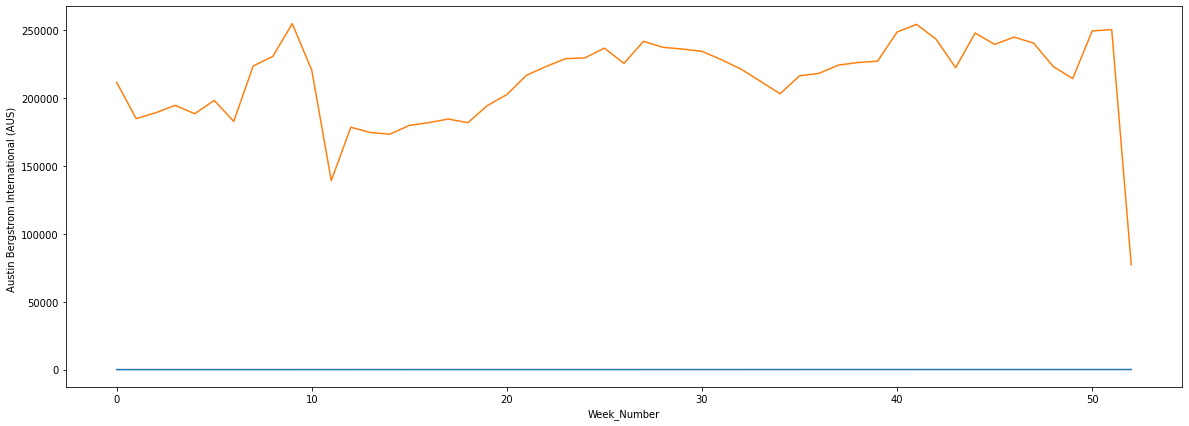

In [41]:
busiest_day.plot(figsize=(20,7), legend=None)
plt.xlabel('Week_Number')
plt.ylabel('Austin Bergstrom International (AUS) ')
plt.show()

In [42]:
windows = [
    ('4 Week', 4),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(busiest_day['Austin Bergstrom International (AUS) '].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

In [43]:
for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]

In [44]:

for label, window_size in windows:
    key = '{} Profile'.format(label)
    profiles[key] = mp.discover.discords(profiles[key], k=5)
    
    window_size = profiles[key]['w']
    mp_adjusted = np.append(profiles[key]['mp'], np.zeros(window_size - 1) + np.nan)
  
    for start_index in profiles[key]['discords']:
        x = dta.index.values[start_index:start_index+window_size]
        y = mp_adjusted[start_index:start_index+window_size]


In [45]:
key = '4 Week Profile'
profile = profiles[key]
window_size = profile['w']
mp_adjusted = np.append(profile['mp'], np.zeros(window_size - 1) + np.nan)
busiest_day[key] = mp_adjusted

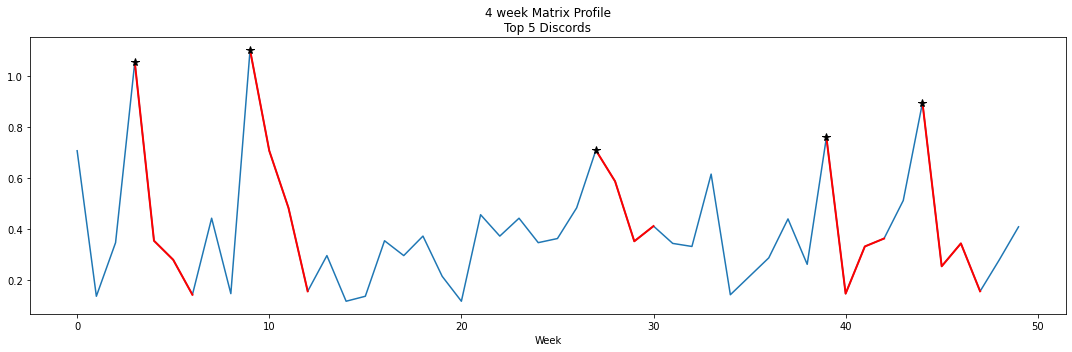

In [46]:
ax = busiest_day[key].plot(title='4 week Matrix Profile\nTop 5 Discords', figsize=(15,5))

for discord in profile['discords']:
    busiest_day.iloc[discord:discord+window_size][key].plot(ax=ax, c='r', lw='2')

busiest_day.iloc[profile['discords']][key].plot(kind='line', marker='*', c='black', markersize=8, ax=ax, lw=0)
plt.xlabel('Week')
plt.tight_layout()
plt.show()

In [47]:
del busiest_day['4 Week Profile']

In [48]:
busiest_day

,Week_Number,Austin Bergstrom International (AUS)
0,1,211529
1,2,184730
2,3,189094
3,4,194539
4,5,188374
5,6,198178
6,7,182734
7,8,223573
8,9,230572
9,10,254676


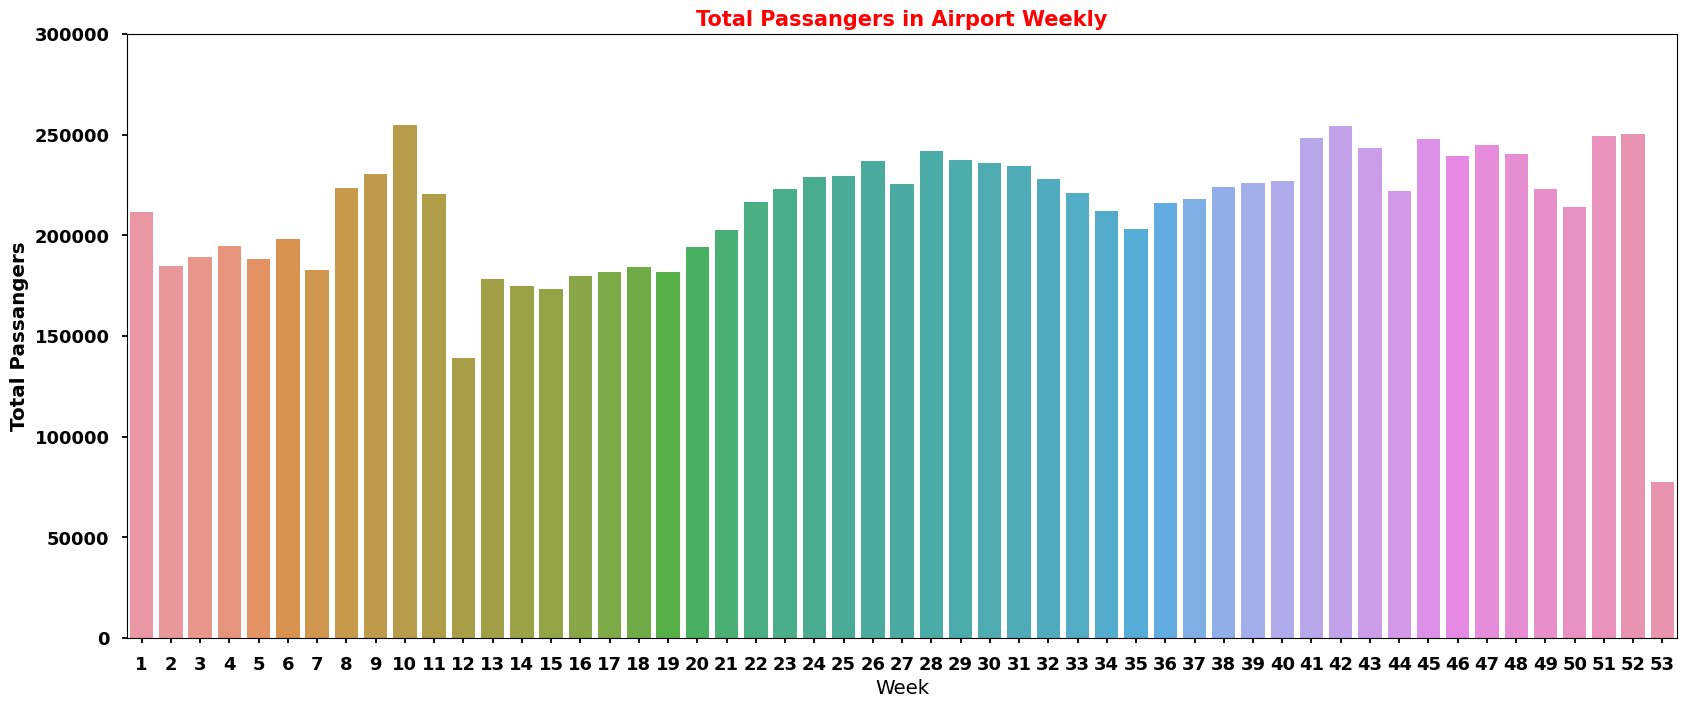

In [49]:
plt.figure(figsize=(20,8),dpi=100),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="Week_Number",y="Austin Bergstrom International (AUS) ",data=busiest_day)

plt.title("Total Passangers in Airport Weekly", weight="bold", c="red",fontsize=15)
plt.xlabel("Week")
plt.ylabel("Total Passangers",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,300000)
plt.show()

**Submitted By:**

**Sakshi Pandey**

**Indian Institute Of Technology , Indore**